# 파이썬 프로그래밍 실기 평가


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as math
from matplotlib import rc
import pandas as pd

# Matplotlib 한글처리 코드
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rc('font', family='Malgun Gothic')
%matplotlib inline

1. 아래 그림과 같이 맨 아랫줄에 * 가 7개인 산 모양 2개를 출력하는 프로그램을 for loop 를 사용해서 만드시오.
단, 산과 산 사이에는 공백이 한 개 있음. 


In [64]:
line = 4

for x in range(1, line * 2, 2):
    for z in range(0,2,1):
        print((" " * ( (line * 2 - 1 - x) // 2 )) + ("*" * x) + (" " * ( (line * 2 - 1 - x) // 2 )), end =' ')
        if z == 1 :
            print(' ' * ( (line * 2 - 1 - x)) + (" " * x), end = ' ')
            
    print()            

   *       *            
  ***     ***           
 *****   *****          
******* *******         


2. 다음의 지뢰찾기 문제를 해결해 보시오. 
정수 n(단, n은 3이상)을 매개변수로 하여 크기가 (n, n)인 리스트를 만들고 여기에 '*'과 ','을 랜덤하게 채워 넣어 이를 출력하고 리턴하는 함수 create_mine(n)을 만드시오


In [68]:
import random
random.seed(1000)


list_y = []
def create_mine(n):
    in_int = n
    for j in range(0,n):
        #list_x = []
        list_x = ""
        for i in range(0,n):
            
            tmp = random.randrange(1,3)
            if tmp == 1:
                #list_x.append('*')
                list_x += '*'
            else : 
                #list_x.append('.')
                list_x += '.'
        list_y.append(list_x)
               
    return list_y
rst = create_mine(4)
print(rst)

['.*..', '*.*.', '***.', '.*.*']


#위에서 만든 (n,n)리스트에서 지뢰찾기 프로그램의 최종 결과를 보여주는 프로그램을 작성하시오. 
단 , *은 지뢰이고 . 은 지뢰가 아니며, 지뢰가 아닌 요소에는 인접한 지뢰의 개수를 출력하고 지뢰는 *로 출력함.


In [77]:
def mine(inp):
    for i in range(len(inp)):
        for j in range(len(inp[i])):
            if inp[i][j] == '.' :
                cnt = 0
                for x in range(i-1, (i+2, i+1)[i+2 > len(inp)]):
                    for y in range(j-1, (j+2, j+1)[j+2 > len(inp)]):
                        if inp[x][y] == '*':
                            cnt += 1
                print(cnt, end='')
            else:
                print('*', end='')
        print()

if __name__ == '__main__':
    #Test
#     inp = ['.*..',
#            '*.*.',
#            '***.',
#            '.*.*']
    
    mine(inp)

        


4*42
*6*2
***3
4*4*


3. 하이퍼볼릭 탄젠트(tanh)함수의 그래프를 -2 * pi 에서 2 * pi 까지 matplotlib를 사용하여 그리시오.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math as math
from matplotlib import rc

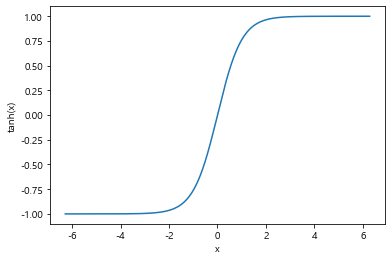

In [6]:
x = np.linspace(-2 * 3.14, 2 * 3.14, 1000)
plt.plot(x, np.tanh(x))
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.axis('tight')
plt.show()

4. 멜론 사이트에서 2020년 5월 월간 국내종합차트 Top 100곡을 크롤링하여 제목, 가수, 앨범명, 전월순위 필드를 가지는 데이터 프레임을 만들고, 1위에서 10위 까지를 출력하는 프로그램을 작성하시오. 
단, 인덱스는 순위로 만들 것

In [7]:
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen

url_base = 'https://www.melon.com'
url_sub = '/chart/index.htm#params%5Bidx%5D=1'
url = url_base + url_sub

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}
req = requests.get('https://www.melon.com/chart/week/index.htm', headers = header) ## 주간 차트를 크롤링 할 것임
html = req.text

#html = urlopen(url)
soup = BeautifulSoup(html, 'html.parser')

m_list = soup.find_all(class_ = 'lst50')
#전월 순위의 경우 상승은 up, 하강은 down, 순위 동일은 none

if m_list[0].find(class_ = 'rank_wrap').find(class_ = 'up') :
    m_list[0].find(class_ = 'rank_wrap').find(class_ = 'up').get_text()
elif m_list[0].find(class_ = 'rank_wrap').find(class_ = 'down') :
    m_list[0].find(class_ = 'rank_wrap').find(class_ = 'down').get_text()
else :
    m_list[0].find(class_ = 'rank_wrap').find(class_ = 'none').get_text()
    
m_list[0].find(class_ = 'rank').get_text()    
#m_list[0].find(class_ = 'ellipsis rank01').find('a').get_text()
#m_list[0].find(class_ = 'ellipsis rank02').find('a').get_text()
#m_list[0].find(class_ = 'ellipsis rank03').find('a').get_text()


'1'

In [8]:
#크롤링 목록
#제목, 가수, 앨범명, 전월순위

In [9]:
title = []
singer= []
album = []
beRank = []
asRank = []
for m in m_list:
    title.append(m.find(class_ = 'ellipsis rank01').find('a').get_text())
    singer.append(m.find(class_ = 'ellipsis rank02').find('a').get_text())
    album.append(m.find(class_ = 'ellipsis rank03').find('a').get_text())
    asRank.append(m.find(class_ = 'rank').get_text())
    if m.find(class_ = 'rank_wrap').find(class_ = 'up') :
       tmp = '+' + str(m.find(class_ = 'rank_wrap').find(class_ = 'up').get_text())
    elif m.find(class_ = 'rank_wrap').find(class_ = 'down') :
       tmp = '-' + str(m.find(class_ = 'rank_wrap').find(class_ = 'down').get_text())
    else :
       tmp = '0' #m.find(class_ = 'rank_wrap').find(class_ = 'none').get_text()
    beRank.append(tmp)

In [21]:
# 데이터 프레임으로 만들기
import pandas as pd #'순위' : asRank ,
df = pd.DataFrame ({'순위' : asRank ,'제목':title, '가수':singer, '앨범명':album,  '전월순위': beRank})

#df.rename(columns=df.iloc[0],inplace=True)
#df.columns = df.iloc[0]
#df=df.reindex(df.index.drop(0))
df.set_index('순위', drop = True, append = False, inplace = True)

df.head(10)


,제목,가수,앨범명,전월순위
순위,,,,
1,사랑하게 될 줄 알았어,전미도,슬기로운 의사생활 OST Part 11,+1
2,에잇(Prod.&Feat. SUGA of BTS),아이유,에잇,-1
3,아로하,조정석,슬기로운 의사생활 OST Part 3,0
4,MORE & MORE,TWICE (트와이스),MORE & MORE,0
5,살짝 설렜어 (Nonstop),오마이걸,NONSTOP,0
6,깡 Official Remix,식케이 (Sik-K),깡 Official Remix,0
7,나비와 고양이 (feat.백현 (BAEKHYUN)),볼빨간사춘기,사춘기집Ⅱ 꽃 본 나비,-3
8,좋은 사람 있으면 소개시켜줘,조이 (JOY),슬기로운 의사생활 OST Part 2,-2
9,"너에게 난, 나에게 넌",미도와 파라솔,슬기로운 의사생활 OST Part 12,+45
